In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('MSFT_sent_news.csv')

In [3]:
data['date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [4]:
data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [5]:
data = data.set_index('date')

In [6]:
data = data.drop(['publication_date'], axis=1)

In [7]:
data[:100]

,compound,headline,neg,neu,pos,label
date,,,,,,
2016-04-22 01:05:08,0.0772,Intel and Microsoft face different challenges ...,0.000,0.874,0.126,0
2016-04-22 02:18:28,0.2500,"Microsoft revenue, profit misses estimates",0.244,0.385,0.372,1
2016-04-27 07:36:08,0.3612,Is India ready for the 'thinnest' laptop age?,0.000,0.737,0.263,1
2016-05-11 06:32:13,0.3612,"Are we ready for chatbots, the next technology...",0.000,0.762,0.238,1
2016-05-25 21:13:59,-0.5994,"Microsoft to cut 1,850 jobs at struggling smar...",0.412,0.588,0.000,-1
2016-05-30 07:50:04,0.0000,Microsoft seeks to empower every Indian: Satya...,0.000,1.000,0.000,0
2016-05-31 11:26:04,0.0000,Newgen Software's unique app now on Windows pl...,0.000,1.000,0.000,0
2016-06-13 10:12:03,0.0000,Microsoft launches its online store with Tata ...,0.000,1.000,0.000,0
2016-06-14 00:19:02,0.0000,Microsoft to buy LinkedIn for $26.2 billion in...,0.000,1.000,0.000,0


In [8]:
news_daily = data.resample('D').mean()

In [9]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [10]:
news_daily.fillna(0, inplace=True)
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-04-22,0.1636,0.122,0.6295,0.249,0.5
2016-04-23,0.0000,0.000,0.0000,0.000,0.0
2016-04-24,0.0000,0.000,0.0000,0.000,0.0
2016-04-25,0.0000,0.000,0.0000,0.000,0.0
2016-04-26,0.0000,0.000,0.0000,0.000,0.0


In [11]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-07-01,0.0,0.0,0.0,0.0,0.0
2016-07-02,0.0,0.0,0.0,0.0,0.0
2016-07-03,0.0,0.0,0.0,0.0,0.0
2016-07-04,0.0,0.0,0.0,0.0,0.0
2016-07-05,0.0,0.0,0.0,0.0,0.0


In [12]:
news_daily.describe()

,compound,neg,neu,pos,label
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.079550,0.045314,0.779814,0.097318,0.187600
std,0.127200,0.046787,0.234509,0.060783,0.270739
min,-0.668600,0.000000,0.000000,0.000000,-1.000000
25%,0.009593,0.014643,0.803656,0.069717,0.000000
50%,0.079774,0.038062,0.844356,0.095830,0.188345
75%,0.142619,0.062661,0.878601,0.126721,0.333333
max,0.844200,0.417000,1.000000,0.558000,1.000000


### Fundamental Data

In [1]:
fund = pd.read_csv('MSFT_Fund.csv')
fund.head()

NameError: name 'pd' is not defined

In [90]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 35 columns):
date                              776 non-null object
marketcap                         776 non-null float64
pricetobook                       776 non-null float64
pricetoearnings                   776 non-null float64
dividendyield                     776 non-null float64
earningsyield                     776 non-null float64
nopat                             776 non-null float64
freecashflow                      776 non-null float64
roe                               776 non-null float64
ebitdagrowth                      776 non-null float64
ebitdamargin                      776 non-null float64
cashdividendspershare             776 non-null float64
bookvaluepershare                 776 non-null float64
capex                             776 non-null float64
currentratio                      776 non-null float64
debttoequity                      776 non-null float64
epsgrowth     

In [91]:
fund['date']= pd.to_datetime(fund.date,format='%d/%m/%Y')

In [92]:

fund.index =fund['date']

In [93]:
#fund=fund.loc['2019-07-01':'2016-07-01']

In [94]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1111 entries, 2019-07-01 to NaT
Data columns (total 35 columns):
date                              776 non-null datetime64[ns]
marketcap                         776 non-null float64
pricetobook                       776 non-null float64
pricetoearnings                   776 non-null float64
dividendyield                     776 non-null float64
earningsyield                     776 non-null float64
nopat                             776 non-null float64
freecashflow                      776 non-null float64
roe                               776 non-null float64
ebitdagrowth                      776 non-null float64
ebitdamargin                      776 non-null float64
cashdividendspershare             776 non-null float64
bookvaluepershare                 776 non-null float64
capex                             776 non-null float64
currentratio                      776 non-null float64
debttoequity                      776 non-null flo

### Price analysis

In [95]:
df_price = pd.read_csv('MSFT_price.csv')

In [96]:
df_price['date']= df_price['date']
df_price['date']=pd.to_datetime(df_price.date,format='%Y-%m-%d')
df_price.index =df_price['date']

In [97]:
#df_price = df_price.drop(['date'], axis=1)

In [98]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-08-19,0,138.41,138.550000,136.885000,137.855000,24370543.0,138.41,2019-08-19,daily,138.55,False,136.885,137.855,24370543.0
2019-08-16,1,136.13,136.460000,134.720000,134.880000,25026151.0,136.13,2019-08-16,daily,136.46,False,134.720,134.880,25026151.0
2019-08-15,2,133.68,134.580000,132.250000,134.390000,28125416.0,133.68,2019-08-15,daily,134.58,False,132.250,134.390,28125416.0
2019-08-14,3,133.98,136.920000,133.670000,136.360000,32527251.0,133.98,2019-08-14,daily,136.92,False,133.670,136.360,32527251.0
2019-08-13,4,138.14,138.339336,134.551948,135.598463,25496593.0,138.60,2019-08-13,daily,138.80,False,135.000,136.050,25496593.0


In [99]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2019-08-19 to 2014-11-11
Data columns (total 14 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 132.4+ KB


In [100]:
import talib
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = talib.SMA(df_price['adj_close'].values,
                              timeperiod=n) / df_price['adj_close']
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)

In [101]:
df_price=df_price.loc['2019-07-01':'2016-07-01']

In [102]:
df_price.ma200

date
2019-07-01         NaN
2019-06-28         NaN
2019-06-27         NaN
2019-06-26         NaN
2019-06-25         NaN
2019-06-24         NaN
2019-06-21         NaN
2019-06-20         NaN
2019-06-19         NaN
2019-06-18         NaN
2019-06-17         NaN
2019-06-14         NaN
2019-06-13         NaN
2019-06-12         NaN
2019-06-11         NaN
2019-06-10         NaN
2019-06-07         NaN
2019-06-06         NaN
2019-06-05         NaN
2019-06-04         NaN
2019-06-03         NaN
2019-05-31         NaN
2019-05-30         NaN
2019-05-29         NaN
2019-05-28         NaN
2019-05-24         NaN
2019-05-23         NaN
2019-05-22         NaN
2019-05-21         NaN
2019-05-20         NaN
                ...   
2016-08-12    1.091499
2016-08-11    1.083570
2016-08-10    1.087619
2016-08-09    1.083125
2016-08-08    1.084666
2016-08-05    1.085465
2016-08-04    1.095133
2016-08-03    1.102117
2016-08-02    1.108580
2016-08-01    1.107468
2016-07-29    1.104238
2016-07-28    1.112267
2016-0

In [103]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 22 columns):
Unnamed: 0     754 non-null int64
adj_close      754 non-null float64
adj_high       754 non-null float64
adj_low        754 non-null float64
adj_open       754 non-null float64
adj_volume     754 non-null float64
close          754 non-null float64
date           754 non-null datetime64[ns]
frequency      754 non-null object
high           754 non-null float64
intraperiod    754 non-null bool
low            754 non-null float64
open           754 non-null float64
volume         754 non-null float64
ma14           754 non-null float64
rsi14          754 non-null float64
ma30           754 non-null float64
rsi30          754 non-null float64
ma50           739 non-null float64
rsi50          738 non-null float64
ma200          589 non-null float64
rsi200         588 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(18), int64(1), object(1)
memory usage: 

In [104]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [105]:
df_price=pd.merge(df_price,fund,how='outer',on='date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [106]:
df_price.index =df_price['date']

In [107]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,34.0,135.229691,136.246306,134.522048,136.176538,22654160.0,135.68,2019-07-01,daily,136.70,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1005
2019-06-28,35.0,133.515400,134.153276,132.713869,134.123375,30042969.0,133.96,2019-06-28,daily,134.60,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
2019-06-27,36.0,133.704769,134.262911,133.066893,133.694802,16557482.0,134.15,2019-06-27,daily,134.71,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
2019-06-26,37.0,133.485499,135.289492,133.156595,133.904105,23657745.0,133.93,2019-06-26,daily,135.74,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
2019-06-25,38.0,132.987159,137.133352,132.289482,136.794481,33327420.0,133.43,2019-06-25,daily,137.59,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059


In [108]:
df_price['Unnamed: 0'].drop

<bound method Series.drop of date
2019-07-01    34.0
2019-06-28    35.0
2019-06-27    36.0
2019-06-26    37.0
2019-06-25    38.0
2019-06-24    39.0
2019-06-21    40.0
2019-06-20    41.0
2019-06-19    42.0
2019-06-18    43.0
2019-06-17    44.0
2019-06-14    45.0
2019-06-13    46.0
2019-06-12    47.0
2019-06-11    48.0
2019-06-10    49.0
2019-06-07    50.0
2019-06-06    51.0
2019-06-05    52.0
2019-06-04    53.0
2019-06-03    54.0
2019-05-31    55.0
2019-05-30    56.0
2019-05-29    57.0
2019-05-28    58.0
2019-05-24    59.0
2019-05-23    60.0
2019-05-22    61.0
2019-05-21    62.0
2019-05-20    63.0
              ... 
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            N

In [109]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1111 entries, 2019-07-01 to NaT
Data columns (total 57 columns):
Unnamed: 0                        754 non-null float64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              776 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float

In [110]:
df_price['ebitda'] = df_price['ebitda'].astype(float)

In [111]:
df_price.columns

Index(['Unnamed: 0', 'adj_close', 'adj_high', 'adj_low', 'adj_open',
       'adj_volume', 'close', 'date', 'frequency', 'high', 'intraperiod',
       'low', 'open', 'volume', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50',
       'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta'],
      dtype='object')

In [112]:
fundamentals=['marketcap', 'pricetobook','pricetoearnings', 'dividendyield', 'earningsyield', 'nopat','freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments','one_yr_monthly_beta']

In [113]:
for column in fundamentals:
    df_price[column] = df_price[column].astype(float)

In [114]:
df_price=df_price[::-1]

In [115]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### EDA

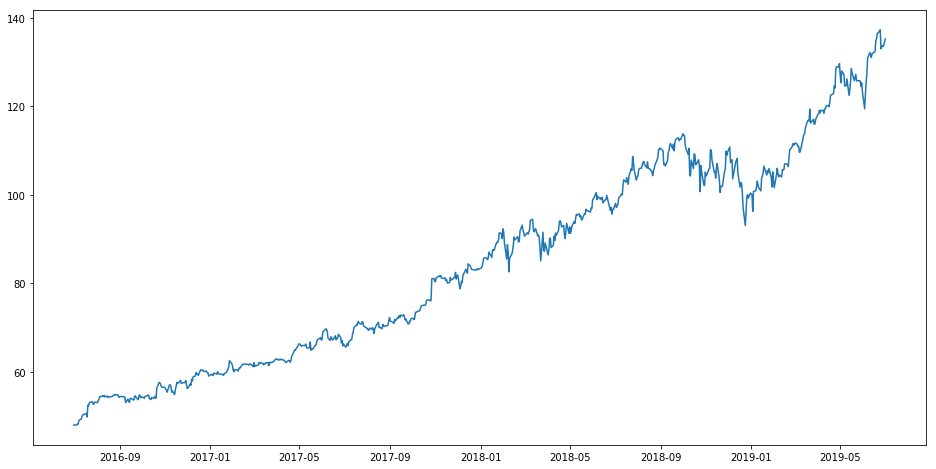

In [116]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

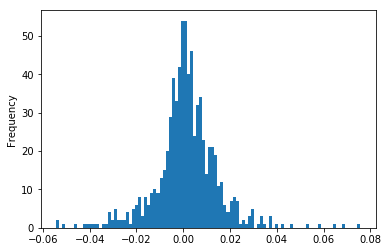

In [117]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

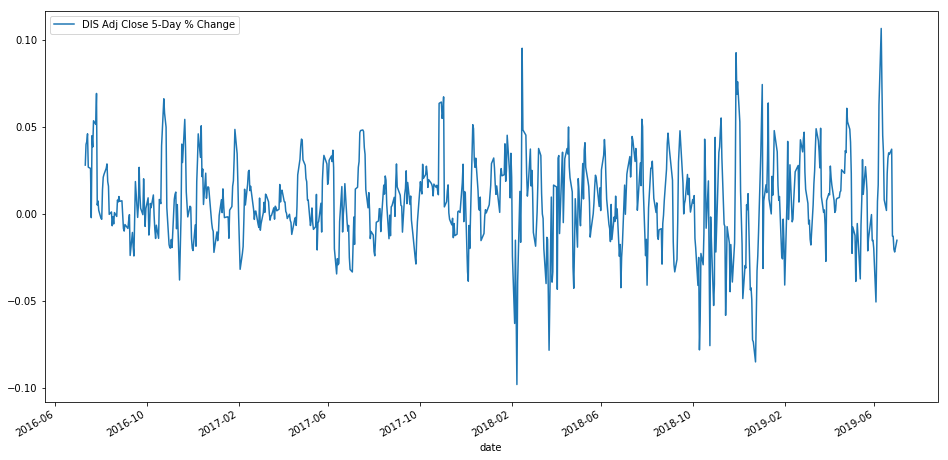

In [118]:
plt.figure(figsize=(16,8))
df_price['adj_close'].pct_change(5).plot(label='DIS Adj Close 5-Day % Change',legend=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.201898
5d_close_future_pct     -0.201898             1.000000


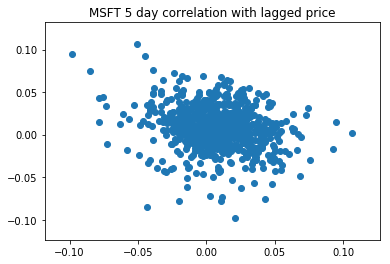

In [119]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_price['5d_future_close'] = df_price['adj_close'].shift(-5)
df_price['5d_close_future_pct'] = df_price['5d_future_close'].pct_change(5)
df_price['5d_close_pct'] = df_price['adj_close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('MSFT 5 day correlation with lagged price')
plt.scatter(df_price['5d_close_pct'], df_price['5d_close_future_pct'])
plt.show()

                     compound  5d_close_future_pct
compound             1.000000            -0.002982
5d_close_future_pct -0.002982             1.000000


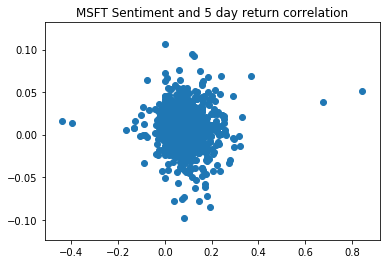

In [120]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['compound', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('MSFT Sentiment and 5 day return correlation')
plt.scatter(df_price['compound'], df_price['5d_close_future_pct'])
plt.show()

                     1d_close_pct  1d_close_future_pct
1d_close_pct             1.000000            -0.148377
1d_close_future_pct     -0.148377             1.000000


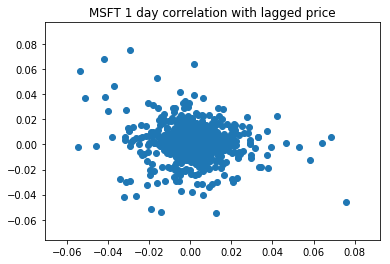

In [121]:
df_1 = df_price
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_1['1d_future_close'] = df_1['adj_close'].shift(-1)
df_1['1d_close_future_pct'] = df_1['1d_future_close'].pct_change(1)
df_1['1d_close_pct'] = df_1['adj_close'].pct_change(1)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['1d_close_pct', '1d_close_future_pct']].corr()
print(corr)
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('MSFT 1 day correlation with lagged price')
plt.scatter(df_1['1d_close_pct'], df_1['1d_close_future_pct'])
plt.show()

                     compound  1d_close_future_pct
compound             1.000000             0.019212
1d_close_future_pct  0.019212             1.000000


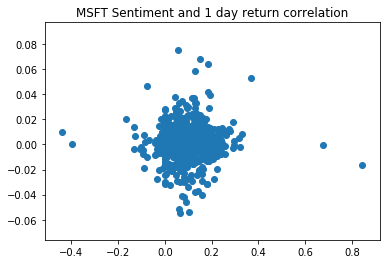

In [122]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['compound', '1d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('MSFT Sentiment and 1 day return correlation')
plt.scatter(df_1['compound'], df_1['1d_close_future_pct'])
plt.show()

                      30d_close_pct  30d_close_future_pct
30d_close_pct                1.0000               -0.0485
30d_close_future_pct        -0.0485                1.0000


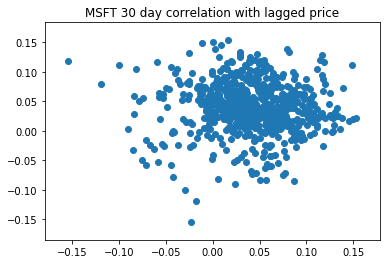

In [123]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_30 = df_price
df_30['30d_future_close'] = df_price['adj_close'].shift(-30)
df_30['30d_close_future_pct'] = df_price['30d_future_close'].pct_change(30)
df_30['30d_close_pct'] = df_price['adj_close'].pct_change(30)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['30d_close_pct', '30d_close_future_pct']].corr()
print(corr)
# Scatter the current 30-day percent change vs the future 5-day percent change
plt.title('MSFT 30 day correlation with lagged price')
plt.scatter(df_30['30d_close_pct'], df_30['30d_close_future_pct'])
plt.show()

                      compound  30d_close_future_pct
compound              1.000000             -0.050706
30d_close_future_pct -0.050706              1.000000


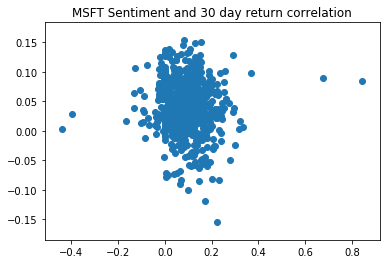

In [124]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['compound', '30d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('MSFT Sentiment and 30 day return correlation')
plt.scatter(df_30['compound'], df_30['30d_close_future_pct'])
plt.show()

In [125]:
df_price = df_price.drop(['Unnamed: 0'], axis =1)

In [126]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1111 entries, NaT to 2019-07-01
Data columns (total 65 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              776 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null float

In [127]:
#df_price['MACD'] = pd.Series(talib.MACD(df_price['adj_close'], fastperiod=12, slowperiod=26, signalperiod=9))
#df_price['STOCH'] = pd.Series(talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0))

In [128]:
#df_price[:50]

#df_price.drop(['MACD','STOCH'], axis =1)

In [129]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = talib.SMA(df_price['adj_close'].values,
                              timeperiod=n) / df_price['adj_close']
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)
    
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    

        

feature_names = feature_names + ['compound'] + fundamentals
print(feature_names)



['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio', 'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome', 'netcashfromoperatingactivities', 'netcashfrominvestingactivities', 'netcashfromfinancingactivities', 'longterminvestments', 'one_yr_monthly_beta']


In [130]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)


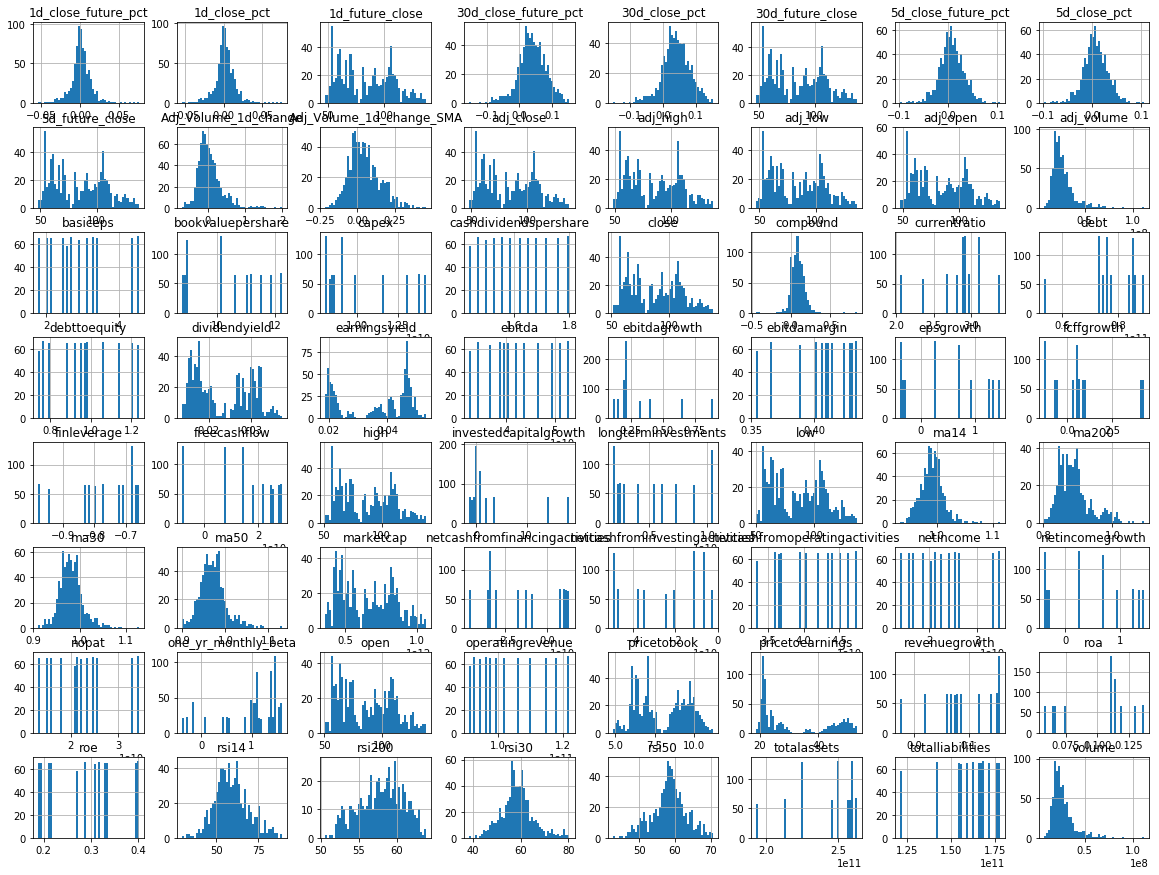

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
df_price.hist(bins=50, figsize=(20,15))
plt.show()

In [132]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1111 entries, NaT to 2019-07-01
Data columns (total 67 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              776 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              741 non-null float64
rsi14                             740 non-null float64
ma30                              725 non-null float

In [133]:
df_price.columns

Index(['adj_close', 'adj_high', 'adj_low', 'adj_open', 'adj_volume', 'close',
       'date', 'frequency', 'high', 'intraperiod', 'low', 'open', 'volume',
       'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200',
       'compound', 'marketcap', 'pricetobook', 'pricetoearnings',
       'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe',
       'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare',
       'bookvaluepershare', 'capex', 'currentratio', 'debttoequity',
       'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage',
       'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_future_close',
       '5d_close_future_pct', '5d_close_pct', '1d_future_close',
       '1d_clos

In [134]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['5d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                                5d_close_future_pct  5d_close_pct      ma14  \
5d_close_future_pct                        1.000000     -0.188315  0.257008   
5d_close_pct                              -0.188315      1.000000 -0.831483   
ma14                                       0.257008     -0.831483  1.000000   
rsi14                                     -0.170297      0.630524 -0.811958   
ma30                                       0.273761     -0.637688  0.860338   
rsi30                                     -0.174495      0.482091 -0.662130   
ma50                                       0.216525     -0.541796  0.748521   
rsi50                                     -0.171120      0.392387 -0.552902   
ma200                                      0.208378     -0.313766  0.443131   
rsi200                                    -0.120526      0.208124 -0.302453   
compound                                  -0.023935      0.114360 -0.101300   
marketcap                                 -0.095770 

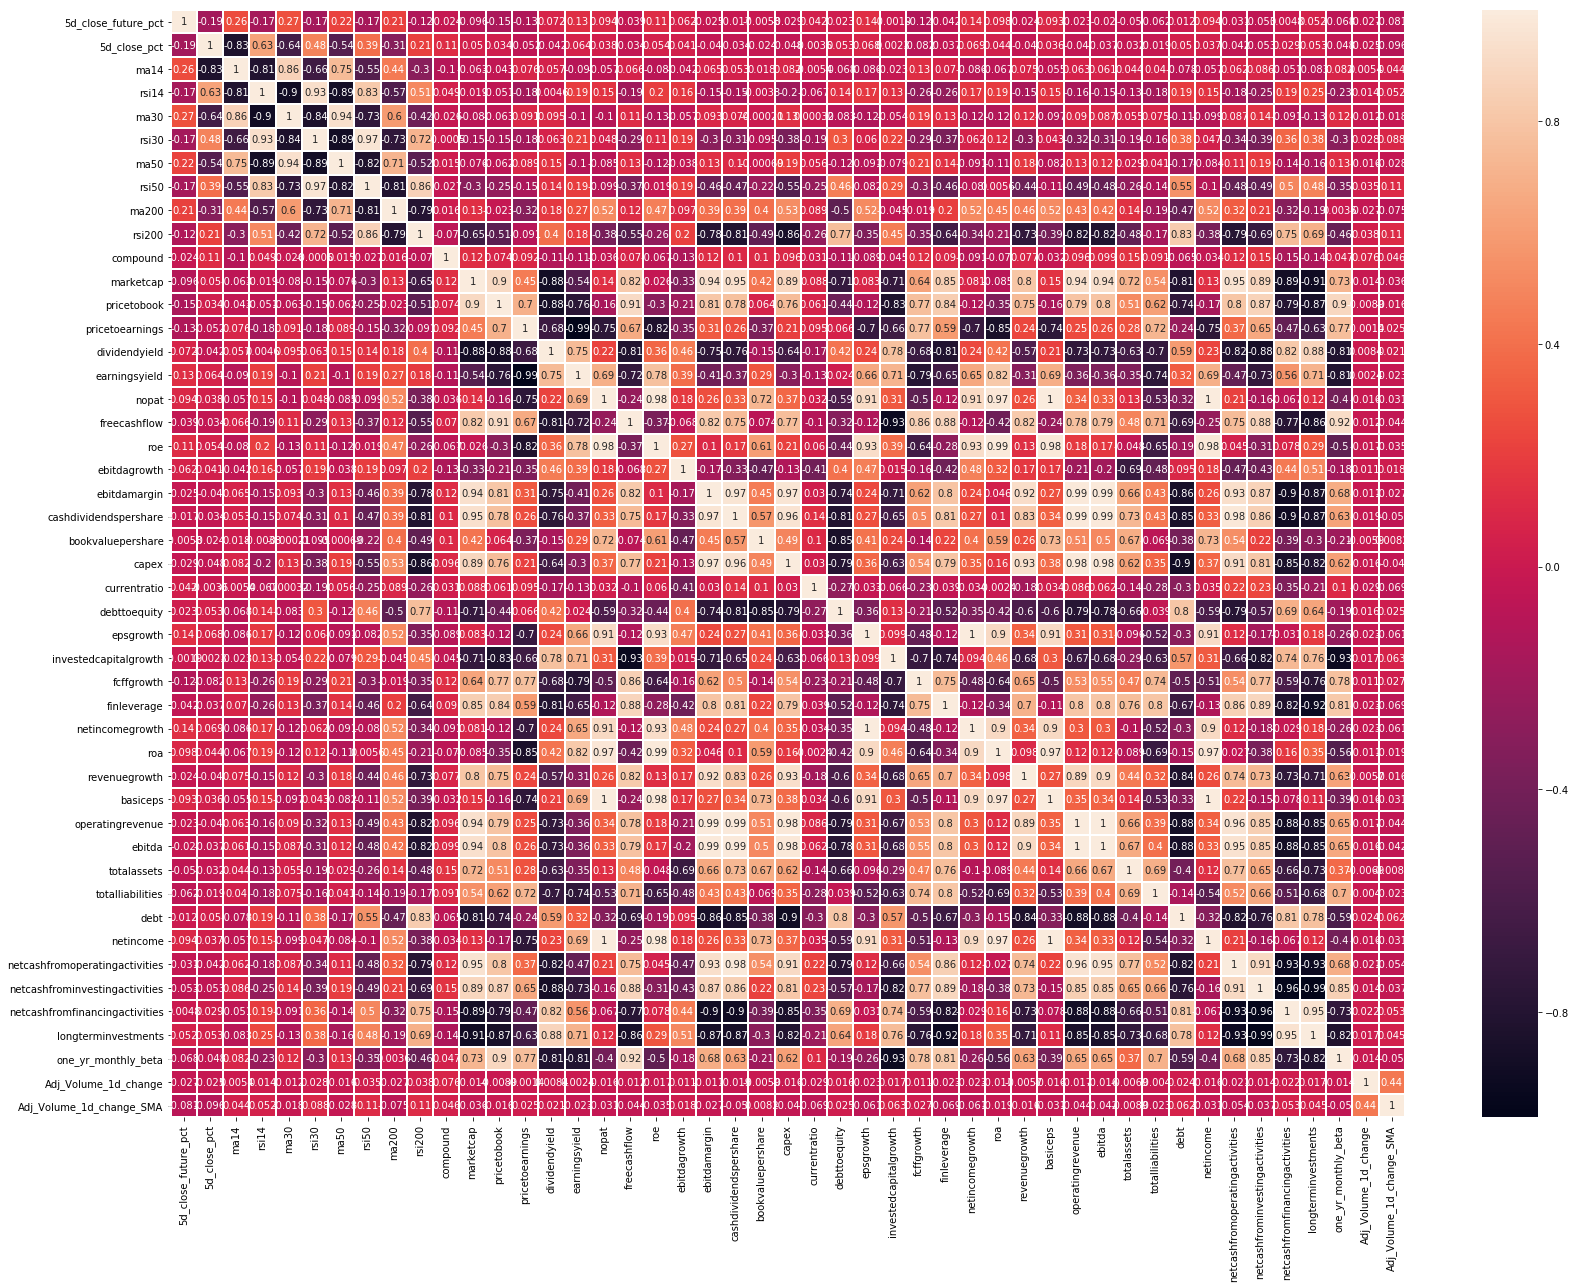

<Figure size 432x288 with 0 Axes>

In [135]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
#plt.scatter(df_price['ma200'], df_price['5d_close_future_pct'])
#plt.show()

In [136]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df_price.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]

# Drop the features in the to_drop list
reduced_df = df_price.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 31 columns


In [137]:
reduced_df.columns

Index(['date', 'frequency', 'intraperiod', 'volume', 'ma14', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'compound', 'dividendyield', 'earningsyield',
       'ebitdagrowth', 'bookvaluepershare', 'currentratio', 'debttoequity',
       'fcffgrowth', 'totalassets', 'totalliabilities', 'debt', 'netincome',
       'one_yr_monthly_beta', '5d_close_future_pct', '5d_close_pct',
       '1d_close_future_pct', '1d_close_pct', '30d_future_close',
       '30d_close_future_pct', '30d_close_pct', 'Adj_Volume_1d_change',
       'Adj_Volume_1d_change_SMA'],
      dtype='object')

In [138]:
feature_names=['volume', 'ma14', 'rsi50', 'ma200',
       'rsi200', 'compound',
       'pricetobook', 'dividendyield', 'freecashflow', 'capex',
       'currentratio', 'debttoequity', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth',
       'operatingrevenue', 'netincome', 'netcashfromoperatingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta',
       '5d_close_pct', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [139]:
feature_names = ['compound',
       'marketcap', 'pricetobook', 'dividendyield', 'earningsyield',
       'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare',
       'currentratio', 'debttoequity', 'fcffgrowth', 'finleverage',
       'revenuegrowth', 'operatingrevenue', 'ebitda', 'totalassets', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_close_pct', 'ma14', 'ma30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [140]:
#feature_names = ['5d_close_pct', 'ma14','ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield']
#feature_names = ['compound']
features = df_price[feature_names]
targets = reduced_df['5d_close_future_pct']





In [141]:
targets.describe()

count    524.000000
mean       0.006927
std        0.026901
min       -0.098133
25%       -0.009046
50%        0.008583
75%        0.024682
max        0.095110
Name: 5d_close_future_pct, dtype: float64

In [142]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:len(targets)]
test_targets = targets[train_size:len(targets)]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(524, 33) (419, 33) (105, 33)
(524, 33) (419, 33) (105, 33)


In [143]:
train_size

419

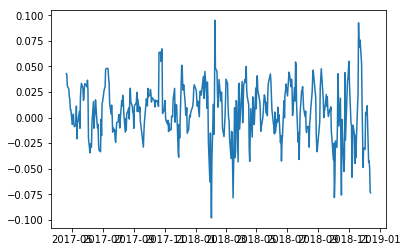

In [144]:
plt.plot(train_targets)

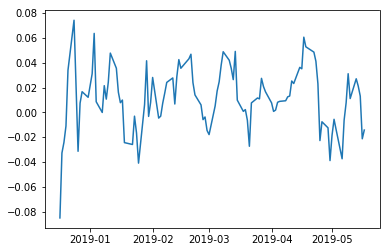

In [145]:
plt.plot(test_targets)

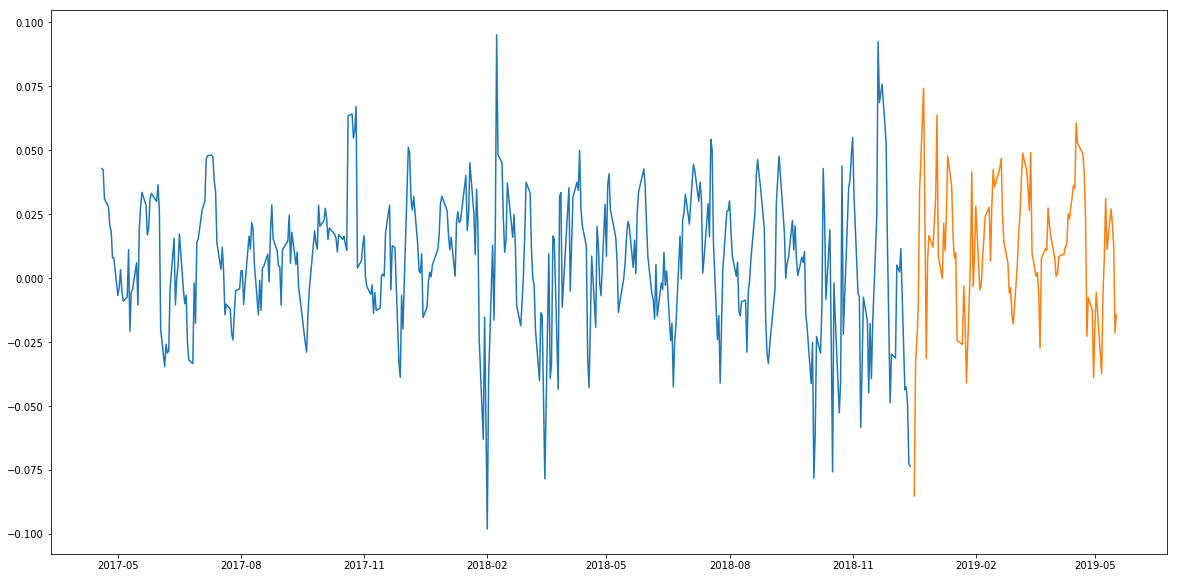

In [146]:
plt.figure(figsize=(20,10))
plt.plot(train_targets)
plt.plot(test_targets)
plt.show()

In [147]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.354
Model:                             OLS   Adj. R-squared:                  0.326
Method:                  Least Squares   F-statistic:                     12.91
Date:                 Mon, 26 Aug 2019   Prob (F-statistic):           6.61e-29
Time:                         16:09:36   Log-Likelihood:                 1008.3
No. Observations:                  419   AIC:                            -1981.
Df Residuals:                      401   BIC:                            -1908.
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

KeyboardInterrupt: 

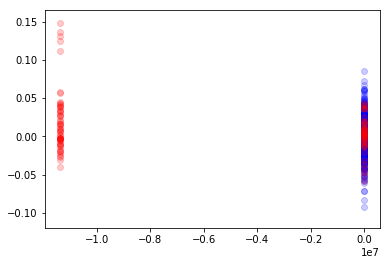

In [454]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [148]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()

In [149]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.3544370538484354
-3976287388656795.5


In [150]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))


0.0004750876933849567
2570697113949.711


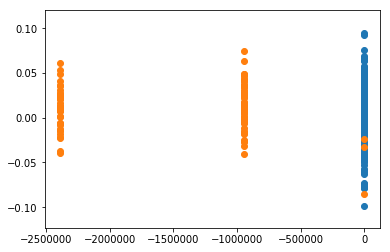

In [151]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [152]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [153]:
scaler = StandardScaler()


scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)

print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(524, 33) (419, 33) (105, 33)
(524, 33) (419, 33) (105, 33)


In [154]:
# scikit-learn:
lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()b

In [155]:
# Look at the R^2 scores on train and test
print(lr.score(scaled_train_features, train_targets))
print(lr.score(scaled_test_features, test_targets))

0.3544370610619002
-21.109103033640295


In [156]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))
rsme_train = np.sqrt(mean_squared_error(train_targets, train_predictions))
rsme_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print('Train Root mean squared error: ' + str(rsme_train))
print('Test Root mean squared error: ' + str(rsme_test))

0.0004750876880763677
0.014293687001279663
Train Root mean squared error: 0.02179650632730777
Test Root mean squared error: 0.11955620854342808


In [157]:
column =['Prediction']
test= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)
#test

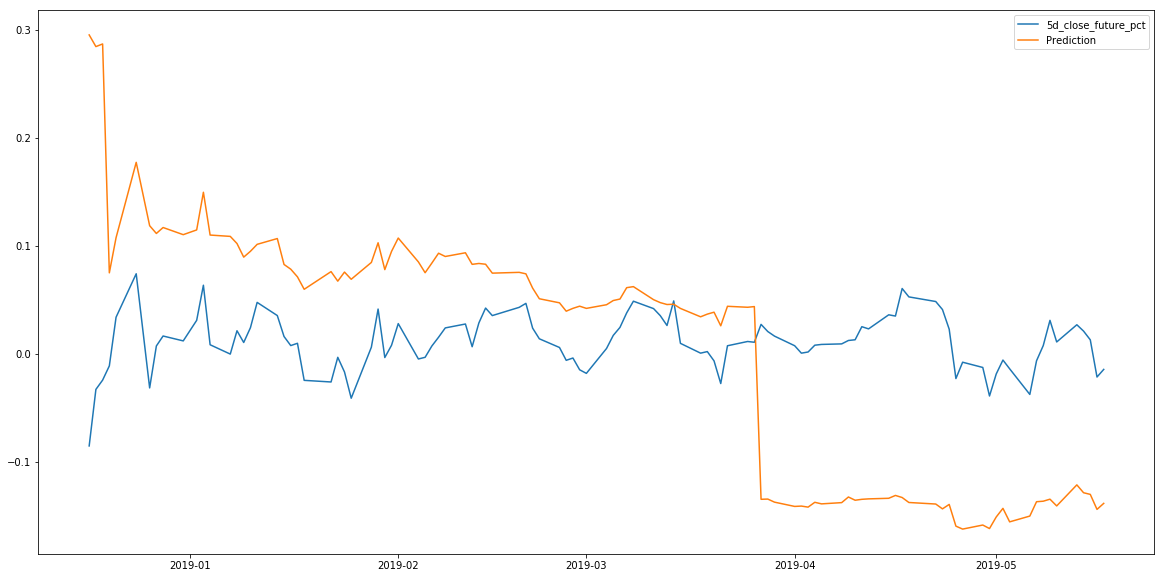

In [158]:
plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(test)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

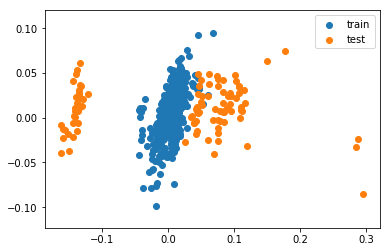

In [159]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Lasso And Ridge - https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
scaler = StandardScaler()
# Fit the scaler on the training features and transform these in one go
scaled_train_features = scaler.fit_transform(train_features)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [161]:
# Transform the test set with the pre-fitted scaler
scaled_test_features = scaler.transform(test_features)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(scaled_test_features, test_targets)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict -4.1% of the variance in the test set.
The model has ignored 33 out of 33 features.


In [162]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.01,normalize=True)

lassoReg.fit(train_features, train_targets)

pred = lassoReg.predict(test_features)
train_pred= lassoReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

0.0
-0.04103546770167643
0.014293687001279663
0.11955620854342808


In [204]:
from sklearn.linear_model import Ridge

alphas = np.array([20,10,5,4,3,2,1.5,1,0.5,0.1,0.01,0.001,0.0001,0])
test_scores=[]
train_scores=[]

for n in alphas:
    ridgeReg = Ridge(alpha=n, normalize=True)
    ridgeReg.fit(train_features, train_targets)
    pred = ridgeReg.predict(test_features)
    train_pred= ridgeReg.predict(train_features)
    train_score = r2_score(train_targets, train_pred)
    train_scores.append(train_score)
    score = r2_score(test_targets, pred)
    test_scores.append(score)


ridge=pd.DataFrame(data=test_scores, index=alphas)

print(ridge)

                    0
20.0000 -6.243444e-02
10.0000 -9.487070e-02
5.0000  -1.734675e-01
4.0000  -2.143867e-01
3.0000  -2.812996e-01
2.0000  -4.055896e-01
1.5000  -5.164130e-01
1.0000  -7.063949e-01
0.5000  -1.141426e+00
0.1000  -3.297743e+00
0.0100  -9.839257e+00
0.0010  -1.221436e+01
0.0001  -1.195339e+01
0.0000  -2.370186e+21


In [205]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.5, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.1787913410642339
Test r2: -1.141425970859434


In [203]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=1, normalize=False)

ENreg.fit(train_features,train_targets)

pred_cv = ENreg.predict(test_features)
train_pred= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.1507325198874
Test r2: -1.141425970859434


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### PLS - https://www.idtools.com.au/partial-least-squares-regression-python/

In [165]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=1)

# Fit
pls.fit(scaled_train_features, train_targets)

# Prediction
train_predicitions = pls.predict(scaled_train_features)
test_predicitions = pls.predict(scaled_test_features)

# Calculate scores
train_score = r2_score(train_targets,train_predictions)
score = r2_score(test_targets, test_predictions)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
print(mse)
print(np.sqrt(mse))


Train r2: 0.3544370610619002
Test r2: -21.109103033640295
0.014293687001279663
0.11955620854342808


In [166]:
from sys import stdout
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.signal import savgol_filter
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [167]:
X_calib = scaled_train_features
Y_calib = train_targets
X_valid = scaled_test_features
Y_valid = test_targets

def prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False):
 
    #Run PLS including a variable number of components, up to 40,  and calculate MSE
    mse = []
    component = np.arange(1, 29)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Fit
        pls.fit(train_features, Y_calib)
        # Prediction
        Y_pred = pls.predict(X_valid)
 
        mse_p = mean_squared_error(Y_valid, Y_pred)
        mse.append(mse_p)
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(xmin=-1)
 
        plt.show()
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=msemin+1)
    pls.fit(train_features, Y_calib)
    Y_pred = pls.predict(X_valid) 
    
    # Calculate and print scores
    score_p = r2_score(Y_valid, Y_pred)
    mse_p = mean_squared_error(Y_valid, Y_pred)
    sep = np.std(Y_pred[:,0]-Y_valid)
    rpd = np.std(Y_valid)/sep
    bias = np.mean(Y_pred[:,0]-Y_valid)
    
    print('R2: %5.3f'  % score_p)
    print('MSE: %5.3f' % mse_p)
    print('SEP: %5.3f' % sep)
    print('RPD: %5.3f' % rpd)
    print('Bias: %5.3f' %  bias)
 
    # Plot regression and figures of merit
    rangey = max(Y_valid) - min(Y_valid)
    rangex = max(Y_pred) - min(Y_pred)
 
    z = np.polyfit(Y_valid, Y_pred, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(Y_pred, Y_valid, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*Y_valid, Y_valid, c='blue', linewidth=1)
        ax.plot(Y_valid, Y_valid, color='green', linewidth=1)
        plt.xlabel('Predicted')
        plt.ylabel('Measured')
        plt.title('Prediction')
 
        # Print the scores on the plot
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.1*rangey, 'R$^{2}=$ %5.3f'  % score_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.15*rangey, 'MSE: %5.3f' % mse_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.2*rangey, 'SEP: %5.3f' % sep)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.25*rangey, 'RPD: %5.3f' % rpd)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.3*rangey, 'Bias: %5.3f' %  bias)
        plt.show()

72% completed
Suggested number of components:  1

R2: -224.429
MSE: 0.146
SEP: 0.293
RPD: 0.087
Bias: -0.245


/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: 

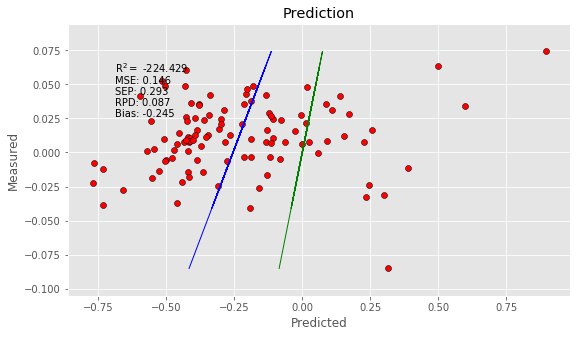

In [168]:
prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False)

[ 52.33  68.03  75.72  81.02  85.89  90.26  93.2   95.49  97.16  98.11
  98.73  99.1   99.33  99.54  99.71  99.83  99.9   99.95  99.97  99.99
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.  ]
0.007906927079830095
-0.05147767124311842
0.0006797875381337415
0.026072735532232546


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


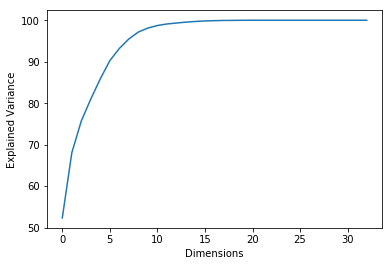

In [211]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#convert it to numpy arrays
X=train_features
X_test=test_features

#Scaling the values
X = scale(X)
X_test=scale(X_test)

pca = PCA(n_components=33)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_



#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

plt.plot(var1)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')

#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=1)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

from sklearn import linear_model
regr = linear_model.LinearRegression() 

y = train_targets
regr.fit(X1,y)
pred=regr.predict(X1)
y_pred=regr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
mse = mean_squared_error(test_targets, y_pred)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

### Decision Tree

In [169]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999932135025755
-3.9402306481491607


In [170]:
#Scaled Data
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(scaled_train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(scaled_train_features, train_targets))
print(decision_tree.score(scaled_test_features, test_targets))

0.9999932135025755
-3.1674451144388938


In [171]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.3524853748693424
-2.1400087520125104 

max_depth= 5
0.5133798760266464
-2.014006116237474 

max_depth= 10
0.8023857876856009
-3.9333988825758723 



In [172]:
#Scaled Data
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(scaled_train_features, train_targets))
    print(decision_tree.score(scaled_test_features, test_targets), '\n')

max_depth= 3
-1.3769980333601355
-0.0078943838223966 

max_depth= 5
-3.226417788210525
-0.5287338642909685 

max_depth= 10
-1.1270737652397074
-0.5860574391522624 



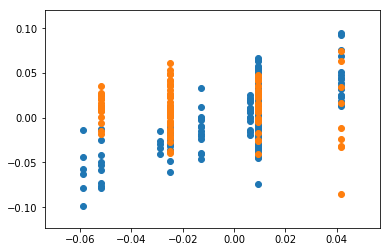

In [173]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [174]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9346203833748102
-2.207800581992714


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [175]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-0.9205526647901074 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [176]:
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.37692763981721233
-0.9205526647901074


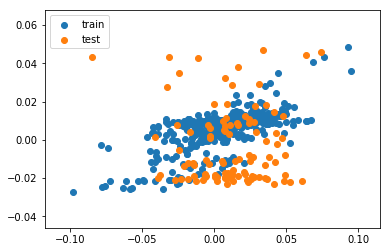

In [177]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

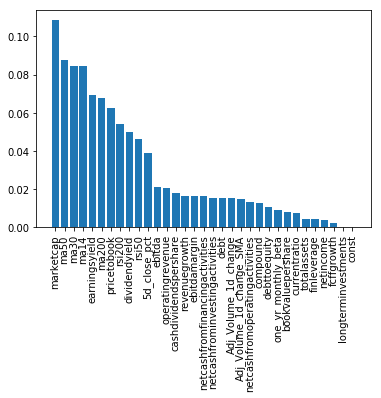

In [178]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
#x = range(features.shape)
# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

In [179]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.4550930217059851
-1.041433577397214


In [180]:
# Sort feature importances in descending order
#indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
#names = [iris.feature_names[i] for i in indices]

# Create plot
#plt.figure()

# Create plot title
#plt.title("Feature Importance")

# Add bars
#plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
#plt.show()

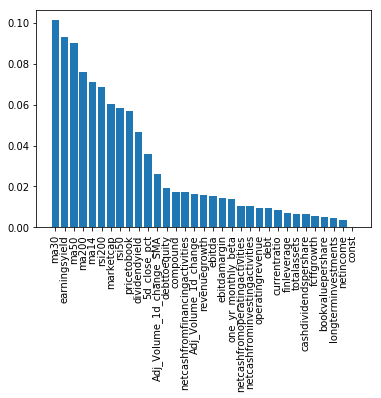

In [181]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(feature_importances))

# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

### K Nearest Neighbour

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


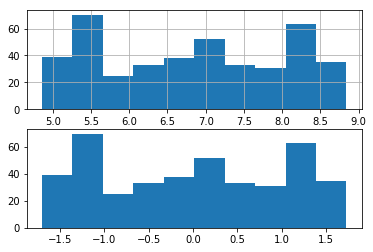

In [182]:


# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [183]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 20):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.8004814790841024
-0.8579941683218564

n_neighbors = 3
train, test scores
0.6956846224853628
-0.44658673941446825

n_neighbors = 4
train, test scores
0.6349208028310713
-0.27750221147120446

n_neighbors = 5
train, test scores
0.5499174518309913
-0.17870798855199355

n_neighbors = 6
train, test scores
0.5199316482683729
-0.11435017819173998

n_neighbors = 7
train, test scores
0.4719444562587092
-0.10608330021370893

n_neighbors = 8
train, test scores
0.4411485458442807
-0.09230966344626701

n_neighbors = 9
train, test scores
0.4177473862678871
-0.04949751359786836

n_neighbors = 10
train, test scores
0.39344809733171404
-0.03896664018158891

n_neighbors = 11
train, test scores
0.3831801413496885
-0.007931524203081963

n_neighbors = 12
train, test scores
0.35357807145937625
-0.03804667116032889

n_neighbors = 13
train, test scores
0.33798280025367655
-0.024381177027078538

n_neighbors = 14
train, test scores
0.32711881922976527
0.012788794859705854

n_

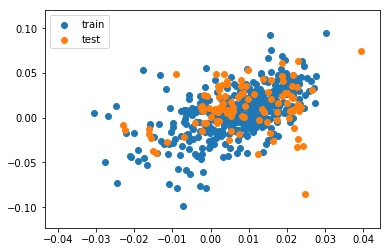

In [184]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=17)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [185]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/25
419/419 [==============================] - 0s 375us/step - loss: 0.1524
Epoch 2/25
419/419 [==============================] - 0s 22us/step - loss: 0.0210
Epoch 3/25
419/419 [==============================] - 0s 21us/step - loss: 0.0101
Epoch 4/25
419/419 [==============================] - 0s 24us/step - loss: 0.0061
Epoch 5/25
419/419 [==============================] - 0s 27us/step - loss: 0.0040
Epoch 6/25
419/419 [==============================] - 0s 33us/step - loss: 0.0036
Epoch 7/25
419/419 [==============================] - 0s 29us/step - loss: 0.0030
Epoch 8/25
419/419 [==============================] - 0s 28us/step - loss: 0.0024
Epoch 9/25
419/419 [==============================] - 0s 26us/step - loss: 0.0019
Epoch 10/25
419/419 [==============================] - 0s 27us/step - loss: 0.0016
Epoch 11/25
419/419 [==============================] - 0s 25us/step - loss: 0.0015
Epoch 12/25
419/419 [==============================] - 0s 32us/step - loss: 0.0013
Epoch 13/25


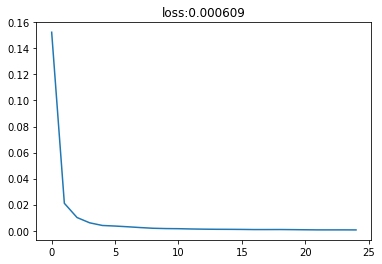

In [186]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

0.23479045064864312
-283.2024545384537


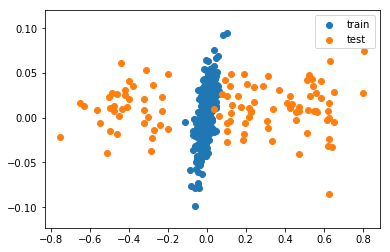

In [187]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [188]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x1a2eacb950>


Epoch 1/25
419/419 [==============================] - 0s 458us/step - loss: 6.1988
Epoch 2/25
419/419 [==============================] - 0s 27us/step - loss: 0.7006
Epoch 3/25
419/419 [==============================] - 0s 24us/step - loss: 0.4663
Epoch 4/25
419/419 [==============================] - 0s 25us/step - loss: 0.2513
Epoch 5/25
419/419 [==============================] - 0s 30us/step - loss: 0.2025
Epoch 6/25
419/419 [==============================] - 0s 27us/step - loss: 0.1527
Epoch 7/25
419/419 [==============================] - 0s 27us/step - loss: 0.1117
Epoch 8/25
419/419 [==============================] - 0s 25us/step - loss: 0.0938
Epoch 9/25
419/419 [==============================] - 0s 25us/step - loss: 0.0923
Epoch 10/25
419/419 [==============================] - 0s 23us/step - loss: 0.0825
Epoch 11/25
419/419 [==============================] - 0s 30us/step - loss: 0.0658
Epoch 12/25
419/419 [==============================] - 0s 31us/step - loss: 0.0835
Epoch 13/25


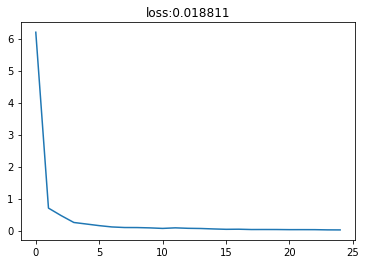

In [189]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-2.973511635952475
-24.095181230388814


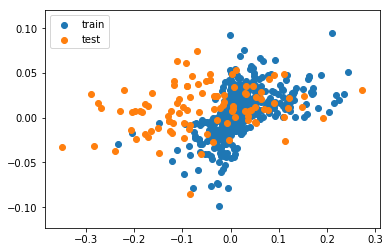

In [190]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25
419/419 [==============================] - 0s 516us/step - loss: 0.3755
Epoch 2/25
419/419 [==============================] - 0s 25us/step - loss: 0.1379
Epoch 3/25
419/419 [==============================] - 0s 27us/step - loss: 0.1001
Epoch 4/25
419/419 [==============================] - 0s 37us/step - loss: 0.0566
Epoch 5/25
419/419 [==============================] - 0s 31us/step - loss: 0.0563
Epoch 6/25
419/419 [==============================] - 0s 28us/step - loss: 0.0377
Epoch 7/25
419/419 [==============================] - 0s 27us/step - loss: 0.0395
Epoch 8/25
419/419 [==============================] - 0s 27us/step - loss: 0.0318
Epoch 9/25
419/419 [==============================] - 0s 36us/step - loss: 0.0344
Epoch 10/25
419/419 [==============================] - 0s 33us/step - loss: 0.0310
Epoch 11/25
419/419 [==============================] - 0s 26us/step - loss: 0.0262
Epoch 12/25
419/419 [==============================] - 0s 35us/step - loss: 0.0248
Epoch 13/25


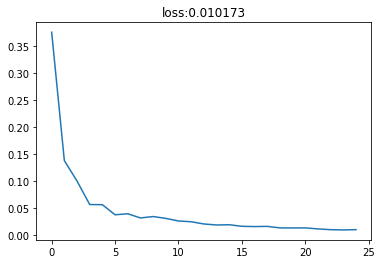

In [191]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [192]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[-0.29762962 -0.23253334 -0.28306568 -0.30581683 -0.22376035]


-0.24528180918558018
-40.69025474927767


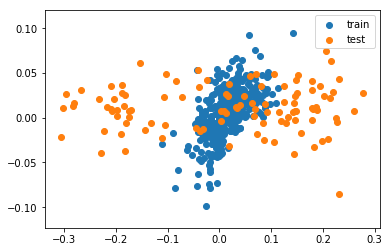

In [193]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()